In [1]:
import pandas as pd
import holidays

# !pip install holidays

In [14]:
TRAFFIC_DATA_PATH = [
    'traffic_flow_2018.csv',
    'traffic_flow_2019.csv'
]

WEATHER_DATA_PATH = [
    'weather_observed_2018.csv',
    'weather_observed_2019.csv'
]


AIR_QUALITY_PATH = [
    'air_quality_2018.csv',
    'air_quality_2019.csv'
]

# df = pd.read_csv('../data/traffic_flow_2018.csv', encoding='latin-1')

In [3]:
pd.set_option("display.max_colwidth", 500)

In [4]:
pt_holidays = holidays.CountryHoliday('Portugal')

In [10]:
#def load_resample_data(files_name):


def load_data(data_paths, date_col, value_cols, agg_operation = 'sum'):
    concat_data = []

    for file in data_paths:
        print("Reading file ", file)
        df = pd.read_csv('../data/' + file, encoding='latin-1')
        
        # print(df.head())

        df[date_col] = pd.to_datetime(df[date_col])
        df_resampled = df.set_index(date_col).groupby('entity_id')[value_cols].resample('H').agg(agg_operation).reset_index()
        concat_data.append(df_resampled)

    return pd.concat(concat_data)

In [11]:
data_entities = pd.read_csv('../data/data_entities.csv', encoding='latin-1', header=0, index_col=False)

date_col = 'dateobservedfrom'
value_cols = ['intensity']
files_name = TRAFFIC_DATA_PATH

traffic_data = load_data(files_name, date_col, value_cols, agg_operation = 'sum')
traffic_data.rename(columns={'dateobservedfrom': 'dateobserved'}, inplace=True)

WEATHER_COLS = [
    'barometricpressure',
    'dewpoint',
    'precipitation',
    'relativehumidity',
    'solarradiation',
    'temperature',
    'winddirection',
    'windspeed',
    'illuminance',
    'uvindexmax',
    'pressuretendency'
]

weather_data = load_data(data_paths = WEATHER_DATA_PATH, date_col = 'dateobserved', value_cols = WEATHER_COLS, agg_operation = 'mean')

AIR_QUALITY_COLS = [
    'no2',
    'o3',
    'ox',
    'co',
    'pm1',
    'pm25',
    'pm10'
]

air_quality_data = load_data(data_paths = AIR_QUALITY_PATH, date_col = 'dateobserved', value_cols = AIR_QUALITY_COLS, agg_operation = 'mean')

Reading file  weather_observed_2018.csv


C:\Users\paulo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Reading file  weather_observed_2019.csv


In [56]:
weather_data.head()

,entity_id,dateobserved,barometricpressure,dewpoint,precipitation,relativehumidity,solarradiation,temperature,winddirection,windspeed,illuminance,uvindexmax,pressuretendency
0,urn:ngsi-ld:AirQualityObserved:porto:weather:ubiwhere:5ad613dd3da2520542bc871a,2018-06-29 18:00:00,1011.000000,NaN,0.0,0.833000,39.099998,19.700001,312.000000,1.500000,NaN,NaN,NaN
1,urn:ngsi-ld:AirQualityObserved:porto:weather:ubiwhere:5ad613dd3da2520542bc871a,2018-06-29 19:00:00,1010.933339,NaN,0.0,0.856417,13.758334,19.533334,269.750000,1.236111,NaN,NaN,NaN
2,urn:ngsi-ld:AirQualityObserved:porto:weather:ubiwhere:5ad613dd3da2520542bc871a,2018-06-29 20:00:00,1011.224991,NaN,0.0,0.887917,1.291667,18.875000,283.000000,1.814815,NaN,NaN,NaN
3,urn:ngsi-ld:AirQualityObserved:porto:weather:ubiwhere:5ad613dd3da2520542bc871a,2018-06-29 21:00:00,1011.225001,NaN,0.0,0.924417,0.508333,18.400000,286.916667,1.046296,NaN,NaN,NaN
4,urn:ngsi-ld:AirQualityObserved:porto:weather:ubiwhere:5ad613dd3da2520542bc871a,2018-06-29 22:00:00,1011.108327,NaN,0.0,0.913167,0.500000,18.708333,248.500000,0.553241,NaN,NaN,NaN


In [57]:
weather_data.head()

,entity_id,dateobserved,barometricpressure,dewpoint,precipitation,relativehumidity,solarradiation,temperature,winddirection,windspeed,illuminance,uvindexmax,pressuretendency
0,urn:ngsi-ld:AirQualityObserved:porto:weather:ubiwhere:5ad613dd3da2520542bc871a,2018-06-29 18:00:00,1011.000000,NaN,0.0,0.833000,39.099998,19.700001,312.000000,1.500000,NaN,NaN,NaN
1,urn:ngsi-ld:AirQualityObserved:porto:weather:ubiwhere:5ad613dd3da2520542bc871a,2018-06-29 19:00:00,1010.933339,NaN,0.0,0.856417,13.758334,19.533334,269.750000,1.236111,NaN,NaN,NaN
2,urn:ngsi-ld:AirQualityObserved:porto:weather:ubiwhere:5ad613dd3da2520542bc871a,2018-06-29 20:00:00,1011.224991,NaN,0.0,0.887917,1.291667,18.875000,283.000000,1.814815,NaN,NaN,NaN
3,urn:ngsi-ld:AirQualityObserved:porto:weather:ubiwhere:5ad613dd3da2520542bc871a,2018-06-29 21:00:00,1011.225001,NaN,0.0,0.924417,0.508333,18.400000,286.916667,1.046296,NaN,NaN,NaN
4,urn:ngsi-ld:AirQualityObserved:porto:weather:ubiwhere:5ad613dd3da2520542bc871a,2018-06-29 22:00:00,1011.108327,NaN,0.0,0.913167,0.500000,18.708333,248.500000,0.553241,NaN,NaN,NaN


In [26]:
air_quality_data.head()

,entity_id,dateobserved,no2,o3,ox,co,pm1,pm25,pm10
0,urn:ngsi-ld:AirQualityObserved:porto:environment:ubiwhere:5adf39366f555a4514e7ea54,2018-06-29 19:00:00,92.291666,15.991667,111.858334,400.441671,19.300000,48.100000,66.050000
1,urn:ngsi-ld:AirQualityObserved:porto:environment:ubiwhere:5adf39366f555a4514e7ea54,2018-06-29 20:00:00,65.308332,31.808334,99.925002,330.191661,18.525000,45.808333,64.525000
2,urn:ngsi-ld:AirQualityObserved:porto:environment:ubiwhere:5adf39366f555a4514e7ea54,2018-06-29 21:00:00,58.083333,36.225000,96.841668,351.274999,16.033333,40.391667,55.008333
3,urn:ngsi-ld:AirQualityObserved:porto:environment:ubiwhere:5adf39366f555a4514e7ea54,2018-06-29 22:00:00,58.716667,33.775000,95.033333,334.049998,14.466667,37.000000,52.175000
4,urn:ngsi-ld:AirQualityObserved:porto:environment:ubiwhere:5adf39366f555a4514e7ea54,2018-06-29 23:00:00,64.233334,25.516667,92.550002,349.308338,18.675000,39.402991,58.678411


In [39]:
data_entities.head()

,entity_id,name,latitude,longitude,entity_type,street,start_date,end_date
0,testsixsq,Rua dos Campeões Europeus,41,162589760000003,-8,5851981169999991,TrafficFlowObserved,Rua dos Campeões Europeus
1,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT10Z2,R. Fernandes Tomás - 24 de Agosto,41,148405920000002,-8,5990938559999996,TrafficFlowObserved,Rua de Fernandes Tomás
2,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT10Z3,R. Camões - N-S,41,154959804999997,-8,6100910160000002,TrafficFlowObserved,Rua de Camões
3,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT10Z4,Av. Boavista - Casa da Música - E-O,41,158700713000002,-8,6335461250000005,TrafficFlowObserved,Avenida da Boavista
4,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT10Z5,Via Panorâmica - Faixa BUS,41,151096148000001,-8,6338182700000008,TrafficFlowObserved,Rua de Entre Campos


In [282]:
df_resampled = traffic_data.merge(data_entities, on='entity_id')
#df_resampled = df_resampled.merge(weather_data, on=['entity_id', 'dateobserved'])
#df_resampled = df_resampled.merge(traffic_data, on=['entity_id', 'dateobserved'])

In [283]:
latbins = pd.cut(df_resampled.latitude, 8, labels=[f'lat{k}' for k in range(1,8+1)], retbins=True)
df_resampled = pd.concat([df_resampled, pd.get_dummies(latbins[0])], axis=1)

longbins = pd.cut(df_resampled.longitude, 8, labels=[f'long{k}' for k in range(1,8+1)], retbins=True)
df_resampled = pd.concat([df_resampled, pd.get_dummies(longbins[0])], axis=1)

In [284]:
df_resampled.head()

,entity_id,dateobserved,intensity,name,latitude,longitude,entity_type,street,start_date,end_date,...,lat7,lat8,long1,long2,long3,long4,long5,long6,long7,long8
0,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT10Z2,2017-12-31 00:00:00,224,R. Fernandes Tomás - 24 de Agosto,41,148405920000002,-8,5990938559999996,TrafficFlowObserved,Rua de Fernandes Tomás,...,0,0,0,0,0,0,0,0,0,1
1,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT10Z2,2017-12-31 01:00:00,186,R. Fernandes Tomás - 24 de Agosto,41,148405920000002,-8,5990938559999996,TrafficFlowObserved,Rua de Fernandes Tomás,...,0,0,0,0,0,0,0,0,0,1
2,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT10Z2,2017-12-31 02:00:00,177,R. Fernandes Tomás - 24 de Agosto,41,148405920000002,-8,5990938559999996,TrafficFlowObserved,Rua de Fernandes Tomás,...,0,0,0,0,0,0,0,0,0,1
3,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT10Z2,2017-12-31 03:00:00,138,R. Fernandes Tomás - 24 de Agosto,41,148405920000002,-8,5990938559999996,TrafficFlowObserved,Rua de Fernandes Tomás,...,0,0,0,0,0,0,0,0,0,1
4,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT10Z2,2017-12-31 04:00:00,75,R. Fernandes Tomás - 24 de Agosto,41,148405920000002,-8,5990938559999996,TrafficFlowObserved,Rua de Fernandes Tomás,...,0,0,0,0,0,0,0,0,0,1


In [285]:
df_resampled.columns

Index(['entity_id', 'dateobserved', 'intensity', 'name', 'latitude',
       'longitude', 'entity_type', 'street', 'start_date', 'end_date', 'lat1',
       'lat2', 'lat3', 'lat4', 'lat5', 'lat6', 'lat7', 'lat8', 'long1',
       'long2', 'long3', 'long4', 'long5', 'long6', 'long7', 'long8'],
      dtype='object')

In [286]:
####### 

In [287]:
df_resampled['day'] = df_resampled['dateobserved'].dt.day
df_resampled['hour'] = df_resampled['dateobserved'].dt.hour
df_resampled['hour_sin'] = np.sin(df_resampled['hour'])
df_resampled['month'] = df_resampled['dateobserved'].dt.month
df_resampled['dayofweek'] = df_resampled['dateobserved'].dt.dayofweek
df_resampled['year'] = df_resampled['dateobserved'].dt.year
df_resampled['quarter'] = df_resampled['dateobserved'].dt.year
df_resampled['is_holiday'] = df_resampled['dateobserved'].apply(lambda x: x in pt_holidays)
df_resampled['is_year_end'] = df_resampled['dateobserved'].dt.is_year_end
df_resampled['is_weekend'] = np.where(df_resampled['dayofweek'].isin([5, 6]), 1, 0)

In [288]:
# Set target
df_resampled['target'] = df_resampled.groupby('entity_id')['intensity'].shift(-24)

In [289]:
df_resampled.head()

,entity_id,dateobserved,intensity,name,latitude,longitude,entity_type,street,start_date,end_date,...,hour,hour_sin,month,dayofweek,year,quarter,is_holiday,is_year_end,is_weekend,target
0,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT10Z2,2017-12-31 00:00:00,224,R. Fernandes Tomás - 24 de Agosto,41,148405920000002,-8,5990938559999996,TrafficFlowObserved,Rua de Fernandes Tomás,...,0,0.000000,12,6,2017,2017,False,True,1,170.0
1,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT10Z2,2017-12-31 01:00:00,186,R. Fernandes Tomás - 24 de Agosto,41,148405920000002,-8,5990938559999996,TrafficFlowObserved,Rua de Fernandes Tomás,...,1,0.841471,12,6,2017,2017,False,True,1,245.0
2,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT10Z2,2017-12-31 02:00:00,177,R. Fernandes Tomás - 24 de Agosto,41,148405920000002,-8,5990938559999996,TrafficFlowObserved,Rua de Fernandes Tomás,...,2,0.909297,12,6,2017,2017,False,True,1,179.0
3,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT10Z2,2017-12-31 03:00:00,138,R. Fernandes Tomás - 24 de Agosto,41,148405920000002,-8,5990938559999996,TrafficFlowObserved,Rua de Fernandes Tomás,...,3,0.141120,12,6,2017,2017,False,True,1,117.0
4,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT10Z2,2017-12-31 04:00:00,75,R. Fernandes Tomás - 24 de Agosto,41,148405920000002,-8,5990938559999996,TrafficFlowObserved,Rua de Fernandes Tomás,...,4,-0.756802,12,6,2017,2017,False,True,1,131.0


In [290]:
df_resampled[
    (
        (df_resampled.dateobserved == pd.to_datetime('2018-10-07 00:00:00')) | (df_resampled.dateobserved == pd.to_datetime('2018-10-08 00:00:00'))
    ) & (df_resampled.entity_id == 'urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT10Z2')
][['dateobserved', 'intensity', 'target']]

,dateobserved,intensity,target
6720,2018-10-07,104,95.0
6744,2018-10-08,95,57.0


In [291]:
# Feature Engineering

df_resampled['yesterday_value'] = df_resampled.groupby('entity_id')['intensity'].shift(24)

In [292]:
rolling_fts_24h = df_resampled.groupby('entity_id')['intensity'].shift(1).rolling(24).agg(['mean', 'max', 'min', 'std'])
df_resampled = pd.concat([df_resampled, rolling_fts_24h], axis=1)

In [293]:
rolling_fts_24h_sameday = df_resampled.groupby(['entity_id', 'dayofweek'])['intensity'].shift(1).rolling(24).agg(['mean', 'max', 'min', 'std'])
rolling_fts_24h_sameday.columns = ['mean_2', 'max_2', 'min_2', 'std_2']
df_resampled = pd.concat([df_resampled, rolling_fts_24h_sameday], axis=1)

In [294]:
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

In [295]:
# Train baseline model

#COLS = ['intensity', 'day', 'hour', 'month', 'dayofweek', 'year', 'quarter', 'is_holiday', 'yesterday_value', 'max', 'mean', 'min', 'std', 'mean_2', 'max_2', 'min_2', 'std_2']
COLS = ['intensity', 'day', 'hour', 'month', 'dayofweek', 'year', 'quarter', 'is_weekend', 'hour_sin', 'is_year_end', 'is_holiday', 'yesterday_value']
COLS = COLS + [f'lat{k}' for k in range(1,8+1)]
COLS = COLS + [f'long{k}' for k in range(1,8+1)]

X_train = df_resampled[0:int(0.8*len(df_resampled))]
X_train = X_train[~X_train.target.isna()]

X_test = df_resampled[int(0.8*len(df_resampled)):]
X_test = X_test[~X_test.target.isna()]

In [296]:
import numpy as np

In [297]:
xgb = XGBRegressor()

xgb.fit(X_train[COLS].fillna(0), X_train['target'])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [298]:
y_pred = xgb.predict(X_test[COLS].fillna(0))

In [299]:
X_test['pred_score'] = y_pred

In [301]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import spearmanr, pearsonr

print("MAE", mean_absolute_error(y_pred, X_test['target']))
print("MSE", mean_squared_error(y_pred, X_test['target']))
print("Spearman Rank", spearmanr(y_pred, X_test['target']))
print("Pearson Rank", pearsonr(y_pred, X_test['target']))

MAE 95.24693304471589
MSE 141939.421243317
Spearman Rank SpearmanrResult(correlation=0.9199443472446241, pvalue=0.0)
Pearson Rank (0.7434963899137548, 0.0)


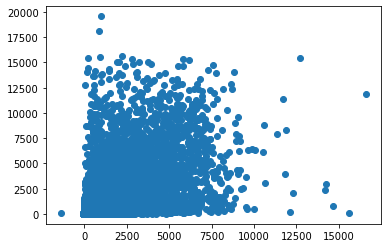

In [302]:
import matplotlib.pyplot as plt

plt.scatter(y_pred, X_test['target'])

In [303]:
xgb.get_booster().get_score(importance_type='weight')

{'intensity': 1358,
 'yesterday_value': 1099,
 'month': 342,
 'day': 523,
 'dayofweek': 325,
 'long1': 75,
 'hour': 424,
 'year': 47,
 'hour_sin': 250,
 'long7': 6,
 'is_holiday': 18,
 'long8': 1,
 'is_year_end': 1}

In [312]:
tmp = X_test[X_test.entity_id == 'urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT6Z7']

In [313]:
tmp = tmp[
    (tmp.dateobserved < '2018-08-12')# & (tmp.dateobserved > '2018-05-18')
]

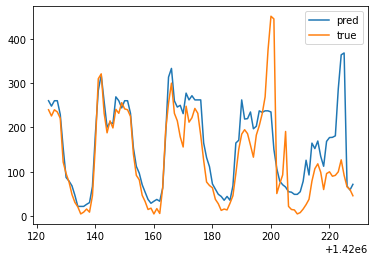

In [314]:
plt.plot(tmp['pred_score'], label='pred')
plt.plot(tmp['target'], label='true')
plt.legend()